# Detect blurred images and face in ROSbag

**This project aims at reducing bandwidth taken by the image ROS topic of the pepper robot**

We want to filter out, blurred images to reduce amount of data we have to deal with inside the pipeline

In [1]:
# import the necessary packages
from imutils import paths
from matplotlib import pyplot as plt
import argparse
import cv2
import face_recognition
import os
import shutil

In [2]:
base_path ='./dataset'

threshold  = 2000.0  # seems to be the best threshold for our dataset

image_path   = base_path + '/original'
dest_blurred = base_path + '/blurred'
dest_sharp   = base_path + '/sharp'

In [3]:
if not os.path.exists(dest_blurred):
    os.makedirs(dest_blurred)
    
if not os.path.exists(dest_sharp):
    os.makedirs(dest_sharp)

In [4]:
def variance_of_laplacian(image):
    # compute the Laplacian of the image and then return the focus
    # measure, which is simply the variance of the Laplacian
    return cv2.Laplacian(image, cv2.CV_64F).var()

In [5]:
def check_if_blurred(folder, threshold, logging=False):
    counter = 0
    total   = 0
    
    for image in paths.list_images(folder):
        image2 = cv2.imread(image)
        gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
        fm = variance_of_laplacian(gray)
        
        # if the focus measure is less than the supplied threshold,
        # then the image should be considered "blurry"
        
        if fm < threshold:
            counter += 1
            shutil.copy2(image, dest_blurred) # target filename is /dst/dir/file.ext
            
        else:
            shutil.copy2(image, dest_sharp) # target filename is /dst/dir/file.ext
         
        total += 1
    
    if logging:
        print("Detected {} blurred images out of {}".format(counter, total))
        print("Blurred image ratio : {}".format(counter / total))
    
    return counter / total

In [6]:
check_if_blurred(image_path, threshold, logging=True)

Detected 758 blurred images out of 1379
Blurred image ratio : 0.5496736765772299


0.5496736765772299

## Check blurred images

In [7]:
image_generator = paths.list_images(image_path)
first_image = None
for i in range(23):
    first_image = next(image_generator)

Sharp


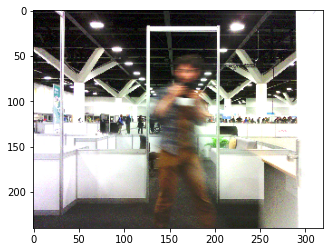

In [8]:
image = cv2.imread(first_image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
fm = variance_of_laplacian(gray)
text = "Not Blurry"
# if the focus measure is less than the supplied threshold,
# then the image should be considered "blurry"
if fm < threshold:
    print("Blurry")
else:
    print("Sharp")
    
plt.imshow(image)

## Check sharp images

In [9]:
for i in range(14):
    first_image = next(image_generator)

Blurry


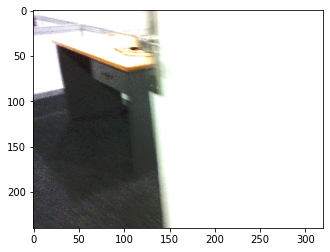

In [10]:
image = cv2.imread(first_image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
fm = variance_of_laplacian(gray)
text = "Not Blurry"
# if the focus measure is less than the supplied threshold,
# then the image should be considered "blurry"
if fm < threshold:
    print("Blurry")
else:
    print("Sharp")
    
plt.imshow(image)